# Linear Discriminant Analysis

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# get the data
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25)

In [18]:
# Performance without LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.9473684210526315


In [19]:
# Run one-dimensional LDA (Fisher)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#
# Documentation is here:
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
#
lda = LDA(n_components=1)
X_train1 = lda.fit_transform(X_train,y_train)

# Performance after LDA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1, y_train)
y_pred = model.predict(lda.transform(X_test))
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.9736842105263158


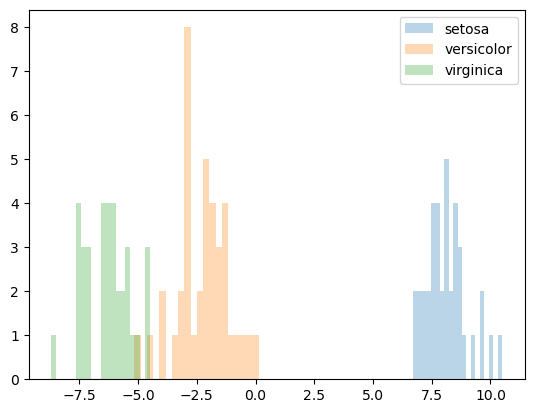

In [20]:
# plot the Discriminant dimension
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=20)
plt.hist(X_train1[y_train==0], **kwargs)
plt.hist(X_train1[y_train==1], **kwargs)
plt.hist(X_train1[y_train==2], **kwargs)
plt.legend(iris.target_names)

In [21]:
# --->>> Your turn <<<---
# Use LDA to reduce the dataset to two dimensions,
# and check how well the linear regression model works on the reduced dataset.

In [22]:
# Using LDA for dimensionality reduction
lda = LDA(n_components=2)
X_train2 = lda.fit_transform(X_train,y_train)

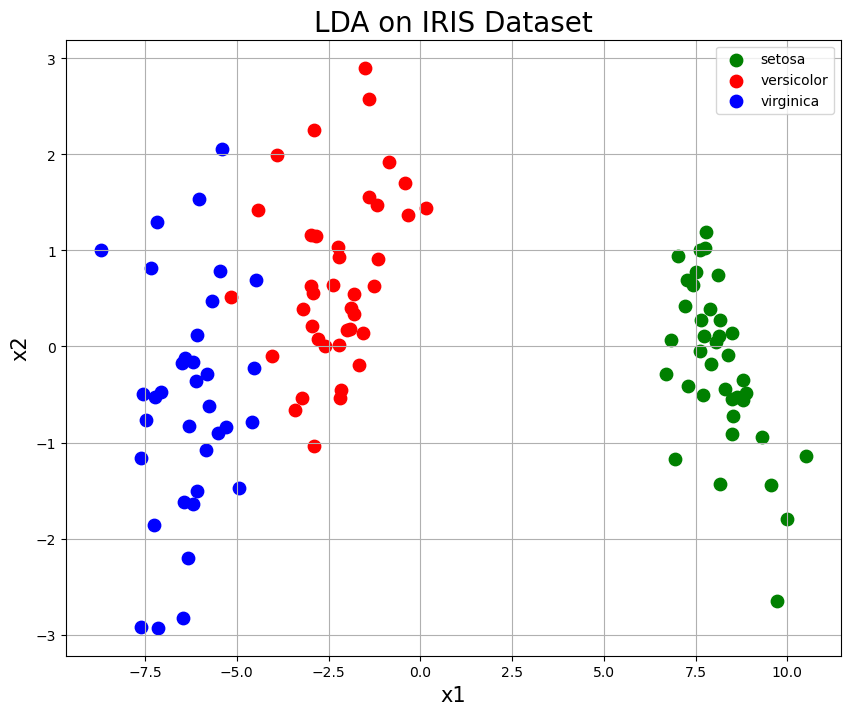

In [23]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('LDA on IRIS Dataset', fontsize = 20)
targets = iris.target_names
colors = ['g', 'r', 'b']
for target, color in zip(np.unique(y_train),colors):
    indicesToKeep = (y_train == target)
    ax.scatter(X_train2[indicesToKeep, 0]
               , X_train2[indicesToKeep, 1]
               , c = color
               , s = 80)
ax.legend(targets)
ax.grid()

In [24]:
# Performance after LDA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train2, y_train)
y_pred = model.predict(lda.transform(X_test))
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.9736842105263158


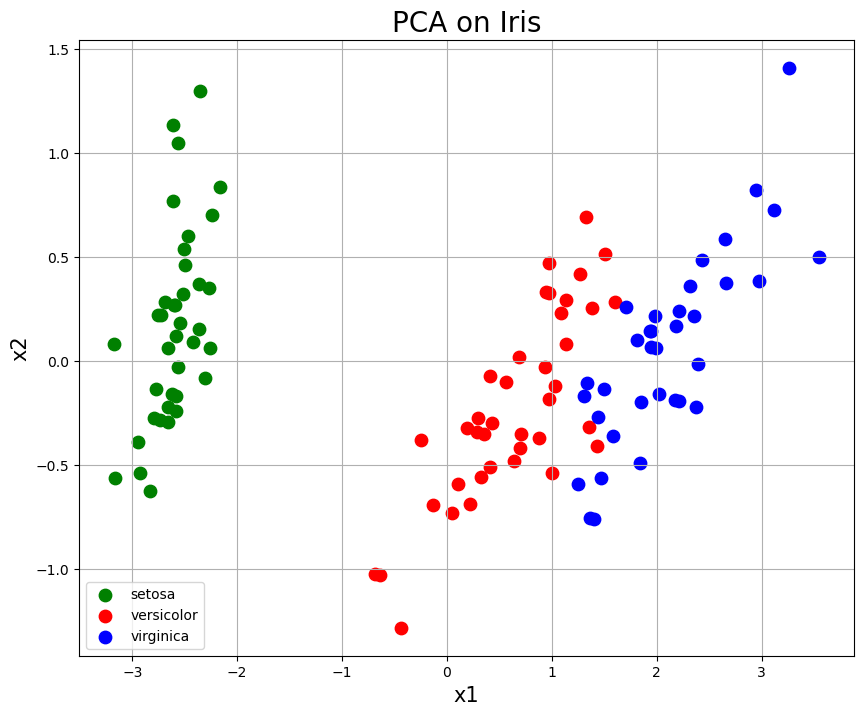

In [25]:
# comparison to PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('PCA on Iris', fontsize = 20)
targets = iris.target_names
colors = ['g', 'r', 'b']
for target, color in zip(np.unique(y_train),colors):
    indicesToKeep = (y_train == target)
    ax.scatter(X_train_pca[indicesToKeep, 0]
               , X_train_pca[indicesToKeep, 1]
               , c = color
               , s = 80)
ax.legend(targets)
ax.grid()